In [3]:
import gym
import minihack
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display

from collections import deque
from queue import PriorityQueue
from utilsMinihackSearch import *
from typing import Tuple, List

In [4]:
# create the environment
env = gym.make("MiniHack-ExploreMaze-Easy-Mapped-v0")
# reset it to initial state
state = env.reset()
# render the environment
env.render()



Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---     ----      ---                                                           
|.       >.        .|                                                           
|.. ....... ... ....|                                                           
|.. . .  .. . .   ..|                                                           
|.... ..... . . ....|                                                           
|..     ... . . .  .|                                                           
|@. ... ..... . ....|                                                           
|.... . ...   .   ..|                                                           
|.... ..... ........|      

In [5]:
!python -m minihack.scripts.env_list


In [6]:
def build_path(parent: dict, target: Tuple[int, int]) -> List[Tuple[int, int]]:
    path = []
    while target is not None:
        path.append(target)
        target = parent[target]
    path.reverse()
    return path

## Breadth-First Search (BFS)¶

In [10]:
def bfs(game_map: np.ndarray, start: Tuple[int, int], target: Tuple[int, int]) -> List[Tuple[int, int]]:
    # Create a queue for BFS and mark the start node as visited
    queue = deque()
    visited = set()
    queue.append(start)
    visited.add(start)

    # Create a dictionary to keep track of the parent node for each node in the path
    parent = {start: None}

    while queue:
        # Dequeue a vertex from the queue
        current = queue.popleft()

        # Check if the target node has been reached
        if current == target:
            print("Target found!")
            path = build_path(parent, target)
            return path

        # Visit all adjacent neighbors of the dequeued vertex
        for neighbor in get_valid_moves(game_map, current):
            if neighbor not in visited:
                queue.append(neighbor)
                visited.add(neighbor)
                parent[neighbor] = current

    print("Target node not found!")
    return None

In [11]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
----.-      ----          ---                                                   
|. ..        ..            .|                                                   
|.... ........> ..... ......|                                                   
|..       . ... . .   .   ..|                                                   
|@....... . ... . ... . . ..|                                                   
|.      .   ...     . . . ..|                                                   
|...... ... ....... ... . ..|                                                   
|.. . .   . ...   . .   . ..|                                                   
|.. . ... ..... . . ..... .

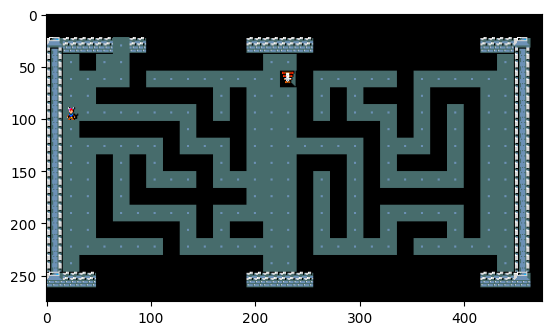

In [12]:
plt.imshow(state['pixel'][25:300, :475])

In [13]:
game_map = state['chars']
game = state['pixel']

In [14]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (7, 1)
Target position: (5, 14)


In [15]:
%%time
path = bfs(game_map, start, target)

Target found!
CPU times: user 468 µs, sys: 17 µs, total: 485 µs
Wall time: 482 µs


In [16]:
path

[(7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (8, 8),
 (9, 8),
 (9, 9),
 (9, 10),
 (10, 10),
 (11, 10),
 (11, 11),
 (11, 12),
 (11, 13),
 (11, 14),
 (10, 14),
 (9, 14),
 (8, 14),
 (7, 14),
 (6, 14),
 (5, 14)]

In [17]:
actions = actions_from_path(start, path[1:])

In [18]:
actions

[1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

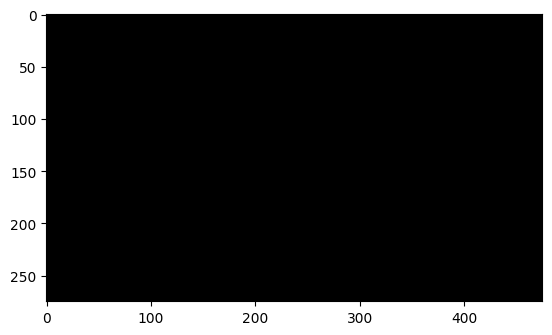

In [19]:
image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])

In [27]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "simple_maze.des",
)
env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              -------------------                               
                              |.................|                               
                              |..-----....|..|..|                               
                              |..|   |..-------.|                               
                              |..--- |.......|..|                               
                              |....| -------.|-.|                               
                           

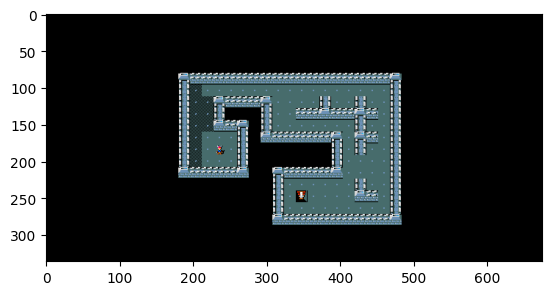

In [28]:
plt.imshow(state['pixel'][:, 300:975])

In [29]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [30]:
%%time
path = bfs(game_map, start, target)

Target found!
CPU times: user 399 µs, sys: 19 µs, total: 418 µs
Wall time: 414 µs


In [31]:
actions = actions_from_path(start, path[1:])

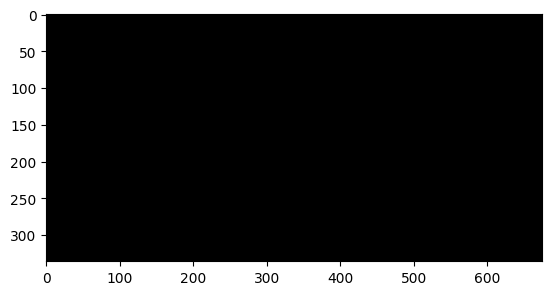

In [32]:
image = plt.imshow(game[:, 300:975])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, 300:975])

In [33]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---         ----          ---                                                   
|.           ..            .|                                                   
|.... ......... . ..........|                                                   
|.... .   . ... . .       ..|                                                   
|.... ... . ..> ... ..... ..|                                                   
|.  .     .  ..   .     . ..|                                                   
|.. . ... ....... ....... ..|                                                   
|@. . . .   ... .         ..|                                                   
|.. ... . ..... . .........

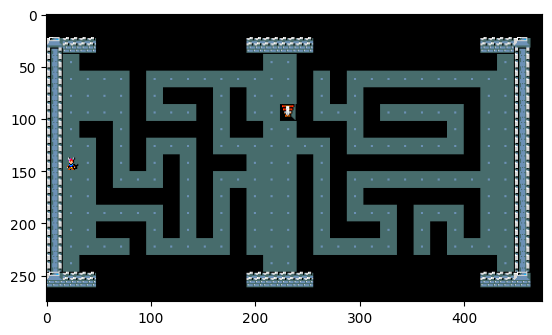

In [34]:
plt.imshow(state['pixel'][25:300, :475])

## A* Search Algorithm

In [35]:
game_map = state['chars']
game = state['pixel']

In [36]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (10, 1)
Target position: (7, 14)


In [38]:
def a_star(game_map: np.ndarray, start: Tuple[int, int], target: Tuple[int, int], h: callable) -> List[Tuple[int, int]]:
    # initialize open and close list
    open_list = PriorityQueue()
    close_list = []
    # additional dict which maintains the nodes in the open list for an easier access and check
    support_list = {}

    starting_state_g = 0
    starting_state_h = h(start, target)
    starting_state_f = starting_state_g + starting_state_h

    open_list.put((starting_state_f, (start, starting_state_g)))
    support_list[start] = starting_state_g
    parent = {start: None}

    while not open_list.empty():
        # get the node with lowest f
        _, (current, current_cost) = open_list.get()
        # add the node to the close list
        close_list.append(current)

        if current == target:
            print("Target found!")
            path = build_path(parent, target)
            return path

        for neighbor in get_valid_moves(game_map, current):
            # check if neighbor in close list, if so continue
            if neighbor in close_list:
                continue
            # compute neighbor g, h and f values
            neighbor_g = 1 + current_cost
            neighbor_h = h(neighbor, target)
            neighbor_f = neighbor_g + neighbor_h
            parent[neighbor] = current
            neighbor_entry = (neighbor_f, (neighbor, neighbor_g))
            # if neighbor in open_list
            if neighbor in support_list.keys():
                # if neighbor_g is greater or equal to the one in the open list, continue
                if neighbor_g >= support_list[neighbor]:
                    continue
            
            # add neighbor to open list and update support_list
            open_list.put(neighbor_entry)
            support_list[neighbor] = neighbor_g

    print("Target node not found!")
    return None

In [39]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 910 µs, sys: 16 µs, total: 926 µs
Wall time: 920 µs


In [40]:
actions = actions_from_path(start, path[1:])

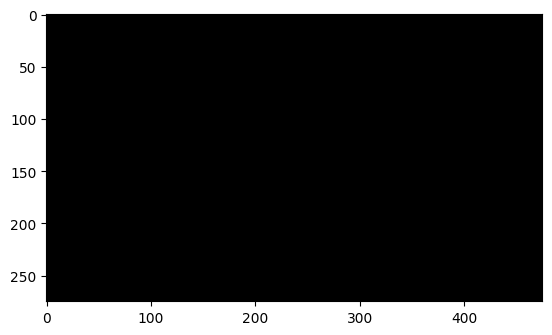

In [41]:
image = plt.imshow(game[25:300, :475])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][25:300, :475])

In [43]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "simple_maze.des",
)
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                              -------------------                               
                              |.................|                               
                              |..-----....|..|..|                               
                              |..|   |..-------.|                               
                              |..--- |.......|..|                               
                              |....| -------.|-.|                               
                           

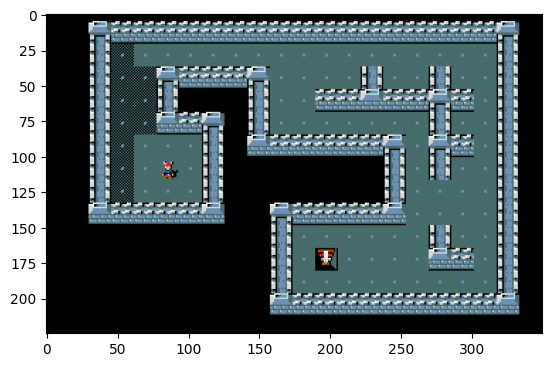

In [44]:
plt.imshow(state['pixel'][75:300, 450:800])

In [45]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [46]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 957 µs, sys: 32 µs, total: 989 µs
Wall time: 1.01 ms


In [47]:
actions = actions_from_path(start, path[1:])

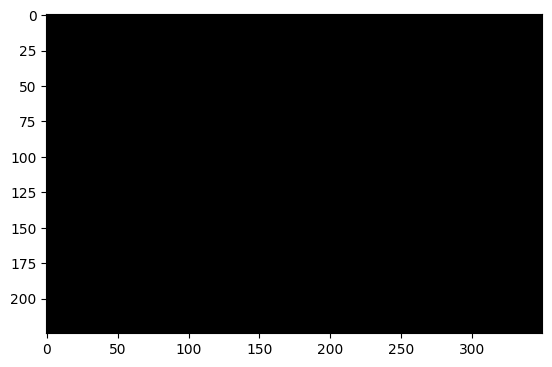

In [48]:
image = plt.imshow(game[75:300, 450:800])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][75:300, 450:800])

In [51]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel"),
    des_file = "complex_maze.des",
)
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                   -----------------                            
                     ----------    |...............|                            
                     |........|    |............|..|                            
                     |........|    |............|..|                            
                     ------...|    |..-----..----..|                            
                          |...|    |..|   |........|                            
                          |...|    |..|   |........|  ------                    
                    -------...------..|   |.....----  |....|                    
                    |.................|   |.....|     |....|                    
                    |..-----....|..|..|   |.....-------....|                    
                    |..|   

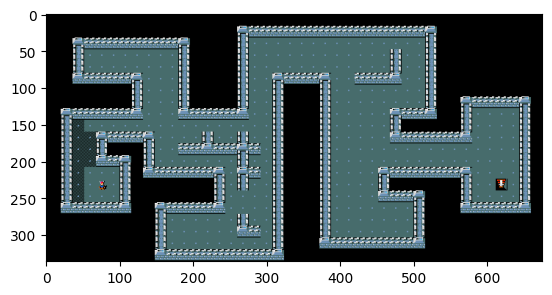

In [53]:
plt.imshow(state['pixel'][:, 300:975])

In [54]:
game_map = state['chars']
game = state['pixel']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [55]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 4.03 ms, sys: 100 µs, total: 4.13 ms
Wall time: 4.15 ms


In [56]:
actions = actions_from_path(start, path[1:])

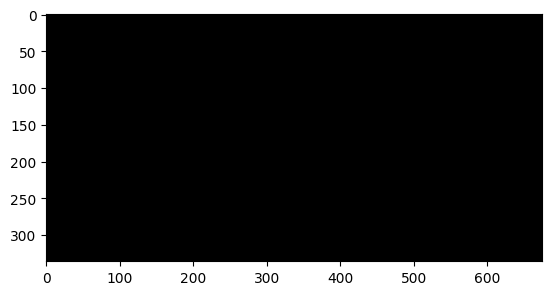

In [57]:
image = plt.imshow(game[:, 300:975])
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, 300:975])

In [59]:
env = gym.make(
    "MiniHack-Navigation-Custom-v0",
    observation_keys=("chars", "pixel_crop"),
    des_file = "complex_maze.des",
)
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                   -----------------                            
                     ----------    |...............|                            
                     |........|    |............|..|                            
                     |........|    |............|..|                            
                     ------...|    |..-----..----..|                            
                          |...|    |..|   |........|                            
                          |...|    |..|   |........|  ------                    
                    -------...------..|   |.....----  |....|                    
                    |.................|   |.....|     |....|                    
                    |..-----....|..|..|   |.....-------....|                    
                    |..|   

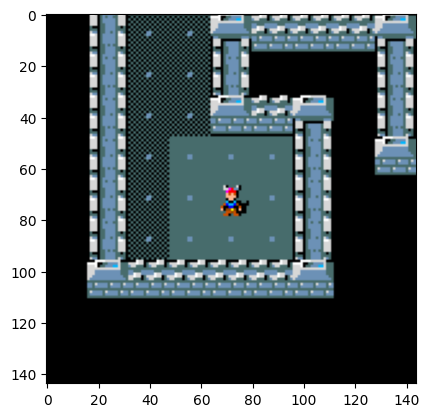

In [60]:
plt.imshow(state['pixel_crop'])

In [61]:
game_map = state['chars']
game = state['pixel_crop']
start = get_player_location(game_map)
target = get_target_location(game_map)

In [62]:
%%time
path = a_star(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 4.11 ms, sys: 144 µs, total: 4.25 ms
Wall time: 4.23 ms


In [63]:
actions = actions_from_path(start, path[1:])

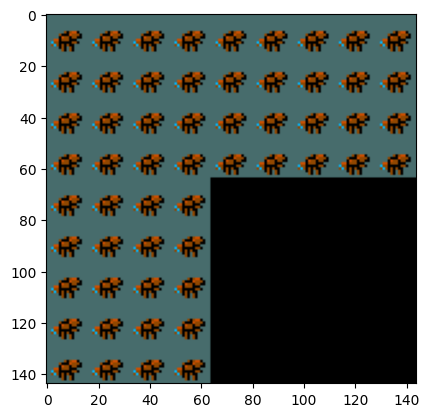

In [64]:
image = plt.imshow(game)
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel_crop'])

## Hill Climb search



In [84]:
def build_path_HillClimb(parent: dict, start: Tuple[int, int], target: Tuple[int, int]) -> List[Tuple[int, int]]:
    path = []
    current = target

    while current is not None and current != start:
        path.append(current)
        current = parent[current]

    path.append(start)  # Add the starting point to the path
    path.reverse()

    return path

In [85]:
def hill_climb(game_map: np.ndarray, start: Tuple[int, int], target: Tuple[int, int], h: callable) -> List[Tuple[int, int]]:
    # initialize open and close list
    open_list = [start]
    close_list = []
    parent = {start: None}

    while open_list:
        # getting the current node
        current = open_list.pop()
        # adding the node to the close list
        close_list.append(current)

        if current == target:
            print("Target found!")
            path = build_path_HillClimb(parent, start,target)
            return path

        for neighbor in get_valid_moves(game_map, current):
            # check if neighbor in close list, if so continue
            if neighbor in close_list:
                continue

            # compute neighbor h value
            neighbor_h = h(neighbor, target)
            parent[neighbor] = current
            # if neighbor not in open list, adding it
            if neighbor not in open_list:
                open_list.append(neighbor)

    print("Target node not found!")
    return None

In [99]:
env = gym.make("MiniHack-ExploreMaze-Hard-Mapped-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
---         ----          ---                                                   
|.           ..            .|                                                   
|.... ..... ... . ... ......|                                                   
|.. .   . . ... . . . .   ..|                                                   
|.. ..... ..... . . ..... ..|                                                   
|..         ..> . .       ..|                                                   
|.. . ..... ... . . ..... ..|                                                   
|@... .   . ... . . .   . ..|                                                   
|.. . . . ..... ... ... . .

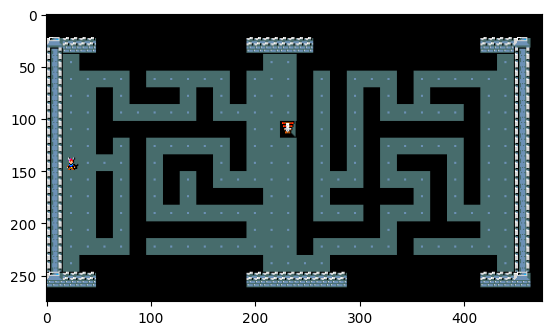

In [100]:
plt.imshow(state['pixel'][25:300, :475])

In [101]:
game_map = state['chars']
game = state['pixel']

In [102]:
start = get_player_location(game_map)
target = get_target_location(game_map)
print("Agent position:", start)
print("Target position:", target)

Agent position: (10, 1)
Target position: (8, 14)


In [103]:
%%time
path = hill_climb(game_map, start, target, manhattan_distance)

Target found!
CPU times: user 311 µs, sys: 13 µs, total: 324 µs
Wall time: 317 µs


In [104]:
path

[(10, 1),
 (9, 1),
 (8, 1),
 (7, 1),
 (6, 1),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (6, 4),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (6, 8),
 (5, 8),
 (5, 9),
 (5, 10),
 (6, 10),
 (7, 10),
 (7, 11),
 (7, 12),
 (6, 12),
 (5, 12),
 (5, 13),
 (4, 13),
 (4, 14),
 (5, 14),
 (6, 14),
 (7, 14),
 (8, 14)]

In [105]:
actions = actions_from_path(start, path[1:])

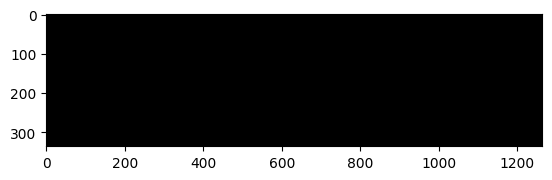

In [106]:
image = plt.imshow(game)
for action in actions:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'])

# Genetic Algorithm

In [ ]:
'''INITIALIZE ENVIRONMENT'''

import gym
import minihack
import matplotlib.pyplot as plt
import IPython.display as display
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt

env_opts = {
    "id": "MiniHack-Navigation-Custom-v0",
    "des_file": "complex_maze.des",
    "observation_keys": ("chars", "pixel"),
}
env = gym.make(
    env_opts["id"],
    observation_keys=env_opts["observation_keys"],
    des_file = env_opts["des_file"],
)
state = env.reset()
game = state['pixel']
image = plt.imshow(game[0:700, 300:1000])  #for complex maze
#image = plt.imshow(game[75:300, 450:800])   #for simple maze

In [ ]:
'''LOAD ENVIRONMENT VARIABLES'''

load_dotenv(".env", override=True)

epochs = int(os.getenv('epochs'))
n_genes = int(os.getenv('n_genes'))
path_length = int(os.getenv('path_length'))
substring_length = int(os.getenv('substring_length'))
shuffle_size = int(os.getenv('shuffle_size'))

print(epochs)
print(n_genes)
print(path_length)
print(substring_length)
print(shuffle_size)

In [ ]:
'''CREATE "n_processes" POPULATIONS, EACH WITH "n_genes" PATHS'''

from multiprocessing import Process, Queue
from ga import ga

q = Queue()
n_processes = 8
processes = []

for i in range(n_processes):
    p = Process(target=ga, args=(env_opts, n_genes, path_length, epochs, substring_length, shuffle_size, q))
    p.start()
    processes.append(p)
for p in processes:
    p.join()

In [ ]:
for p in processes:
    p.terminate()

In [ ]:
paths = []
while q.empty() == False:
    paths.append(q.get())
len(paths)

In [ ]:
len(paths[i])

In [ ]:
'''EXTRACT THE BEST PATH FROM ALL POPULATIONS'''
from ga import heuristic2
best_path = []
min_target_distance = 0
    
for path in paths:
    state = env.reset()
    game_map = state['chars']
    game = state['pixel']
    h = heuristic2(env, path)
    if h > min_target_distance:
        best_path = path
        min_target_distance = h
print(min_target_distance)
print(best_path)

In [ ]:
len(best_path)

In [ ]:
def display_game(image, path):
    try:
        for move in path:
            s, _, _, _ = env.step(move)
            display.display(plt.gcf())
            display.clear_output(wait=True)
            image.set_data(s['pixel'][0:700, 300:1000])
    except:
        return
    
path = best_path
state = env.reset()
game_map = state['chars']
game = state['pixel']
image = plt.imshow(game[0:700, 300:1000])
points = display_game(image, path)